# DL(w6) CNN
student ID: 7110018036\
name: Chieh-An, Chou

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### (check data)

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

[6]


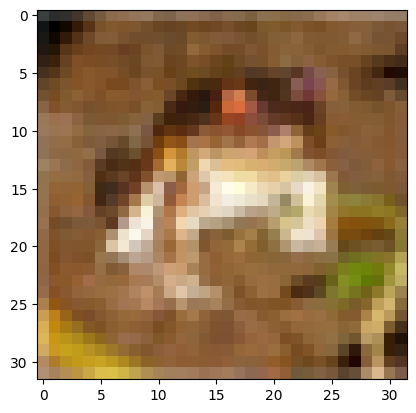

In [5]:
i = 0
print(y_train[i]) # 6: frog
plt.imshow(x_train[i])
plt.show()

### Preprocessing

In [6]:
# x value: 0-255 >> 0-1
x_train = x_train/255
x_test = x_test/255

## 1. Build Model

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPooling2D, AveragePooling2D

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [9]:
model = Sequential([
    # Conv-Pool1
    Conv2D(filters=30,              # number of filters
           kernel_size=(4,4),       # shape of filter_weight matrix
           strides=(1,1), padding='valid', # Default setting
           activation='relu', input_shape=(32,32,3)),
    Dropout(rate=.25),              # to avoid overefitting
    MaxPooling2D(pool_size=(2,2),   # w/o stride >> stride = pool_size
                 padding='valid'),
    # Conv-Pool2
    Conv2D(filters=60, kernel_size=3, strides=2, padding='same', activation='relu'),
    Dropout(rate=.25),
    AveragePooling2D(pool_size=2, padding='same'),
    # Fully Connected Layers
    Flatten(),
    Dropout(rate=.25),
    Dense(1024, activation='relu'),
    Dropout(rate=.25),
    Dense(10, activation='softmax')
])

### (check model)

Output Shape: (mini_batch_size, H, W, C), C = chennels
+ Conv2D: [keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D), [pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
  + $H_{out} = \dfrac{H_{in}+2\times \text{padding}_H-1\times(K_H -1)-1}{\text{stride}_H}+1, W_{out} = \dfrac{W_{in}+2\times \text{padding}_W-1\times(K_W -1)-1}{\text{stride}_W}+1\text{, padding}\begin{cases}0 & \text{, if valid} \\ 1 & \text{, if same}\end{cases}$
  + $\text{Param} = (1+ K_H\times K_W\times C_{in})\times C_{out}$ , K = `kernel_size`
+ MaxPooling2D / AveragePooling2D
  +  `padding='valid'`: $H_{out} = floor( H_{in} / \text{pool}_H ), W_{out} = floor( W_{in} / \text{pool}_W )$
  +  `padding='same'`: $H_{out} = ceil( H_{in} / \text{pool}_H ), W_{out} = ceil( W_{in} / \text{pool}_W )$

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 30)        1470      
                                                                 
 dropout_4 (Dropout)         (None, 29, 29, 30)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 60)          16260     
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 60)          0         
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 60)         0         
 ePooling2D)                                          

## 2. Compile

In [11]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

## 3. Train 

In [13]:
train = model.fit(x_train, y_train, validation_split=.2,    # auto split for validation
                  epochs=10, batch_size=128, verbose=1)     # verbose: 0 -> no results, 1 -> full result, 2 -> only show epoch 

Epoch 1/10
313/313 [==============================] - 1s 5ms/step - loss: 1.4890 - accuracy: 0.4642 - val_loss: 1.3708 - val_accuracy: 0.5336
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 1.3147 - accuracy: 0.5303 - val_loss: 1.2271 - val_accuracy: 0.5821
Epoch 3/10
313/313 [==============================] - 2s 6ms/step - loss: 1.2133 - accuracy: 0.5659 - val_loss: 1.1453 - val_accuracy: 0.6138
Epoch 4/10
313/313 [==============================] - 2s 6ms/step - loss: 1.1347 - accuracy: 0.5980 - val_loss: 1.1217 - val_accuracy: 0.6104
Epoch 5/10
313/313 [==============================] - 2s 6ms/step - loss: 1.0700 - accuracy: 0.6200 - val_loss: 1.0428 - val_accuracy: 0.6444
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 1.0246 - accuracy: 0.6366 - val_loss: 1.0184 - val_accuracy: 0.6482
Epoch 7/10
313/313 [==============================] - 2s 7ms/step - loss: 0.9679 - accuracy: 0.6577 - val_loss: 0.9768 - val_accuracy: 0.6655
Epoch 

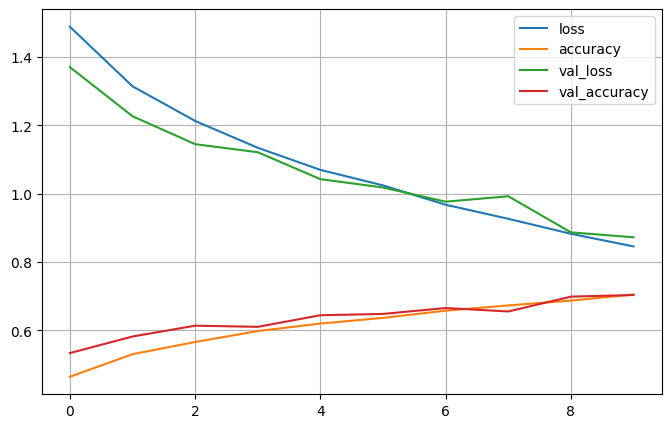

In [14]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

## 4. Evaluate

In [15]:
model.evaluate(x_test, y_test, verbose=0)

[0.8690608143806458, 0.6991000175476074]

## 5. Predict

In [16]:
y_prob = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_prob,axis=1)
print("y_prob = ", y_prob[:3].round(2), sep="\n")
print("y_pred = ", y_pred[:3])
print("y_true = ", y_test[:3].T)

y_prob = 
[[0.   0.   0.06 0.49 0.01 0.37 0.02 0.01 0.03 0.  ]
 [0.03 0.1  0.   0.   0.   0.   0.   0.   0.86 0.  ]
 [0.31 0.06 0.   0.   0.   0.   0.   0.   0.57 0.05]]
y_pred =  [3 8 8]
y_true =  [[3 8 8]]


### (Confussion Matrix)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[803,  18,  52,  14,  15,   3,   7,   3,  60,  25],
       [ 20, 874,  11,   9,   5,   1,   8,   3,  20,  49],
       [ 84,   5, 656,  66,  69,  33,  53,  17,  10,   7],
       [ 30,  16, 136, 508,  61, 136,  56,  30,  13,  14],
       [ 36,   7, 141,  60, 620,  27,  49,  48,   9,   3],
       [ 25,   4, 105, 223,  48, 512,  24,  36,  16,   7],
       [  4,  11,  77,  60,  28,  12, 791,   3,  10,   4],
       [ 21,   5,  65,  54,  66,  48,   8, 719,   3,  11],
       [ 88,  48,  22,  15,   6,   3,   4,   1, 793,  20],
       [ 39, 140,  11,  24,   7,   8,   9,  11,  36, 715]])